## Optimal Employee Work Schedule
* 參考：https://github.com/wurmen/Gurobi-Python/blob/master/python-gurobi%20%20model/Optimal%20Employee%20Work%20Schedule.md
* Gurobipy改用pulp

In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns 
import matplotlib.pyplot as plt
import pulp
#from pulp import LpProblem, LpMinimize, LpVariable, LpBinary

In [2]:
# Load Data
MIN, MAX, COST, START, END = 0, 1, 2, 3, 4
md = {'SMITH':[6,8,30,6,20],'JOHNSON':[6,8,50,0,24],'WILLIAMS':[6,8,30,0,24],
    'JONES':[6,8,30,0,24],'BROWN':[6,8,40,0,24],'DAVIS':[6,8,50,0,24],
    'MILLER':[6,8,45,6,18],'WILSON':[6,8,30,0,24],'MOORE':[6,8,35,0,24],
    'TAYLOR':[6,8,40,0,24],'ANDERSON':[2,3,60,0,6],'THOMAS':[2,4,40,0,24],
    'JACKSON':[2,4,60,8,16],'WHITE':[2,6,55,0,24],'HARRIS':[2,6,45,0,24],
    'MARTIN':[2,3,40,0,24],'THOMPSON':[2,5,50,12,24],'GARCIA':[2,4,50,0,24],
    'MARTINEZ':[2,4,40,0,24],'ROBINSON':[2,5,50,0,24]}

# required person for 24 hrs
REQUIRED = [1, 1, 2, 3, 6, 6, 7, 8, 9, 8, 8, 8, 7, 6, 6, 5, 5, 4, 4, 3, 2, 2, 2, 2]

T = 24

In [3]:
# Create problem
model = pulp.LpProblem("Work_Schedule", pulp.LpMinimize)

In [4]:
# Create variable
x = pulp.LpVariable.dicts("x", [(d, i, j) for d in md.keys() for i in range(T) for j in range(1, T+1)], cat=pulp.LpBinary)
x[('SMITH', 0, 1)]

x_('SMITH',_0,_1)

In [5]:
# Objective finction
model += pulp.lpSum(pulp.lpSum(pulp.lpSum((j - i) * x[d, i, j] * md[d][COST] for j in range(i+1, T+1)) for i in range(T)) for d in md.keys())

In [6]:
# 滿足每班人數
for c in range(len(REQUIRED)):
    model += pulp.lpSum(pulp.lpSum(pulp.lpSum(x[d, i, j] for j in range(i+1, T+1) if i <= c < j) for i in range(T)) for d in md.keys()) == REQUIRED[c]

In [7]:
# 约束条件
## 控制每個人的開始結束時間
for k, v in md.items():
    model += pulp.lpSum(pulp.lpSum(x[k, i, j] for j in range(i+1, v[END]+1) if v[MIN] <= (j - i) <= v[MAX]) for i in range(v[START], v[END]))<=1
    model += pulp.lpSum(pulp.lpSum(x[k, i, j] for j in range(i+1, T+1)) for i in range(T)) <= pulp.lpSum(pulp.lpSum(x[k,i,j] for j in range(i+1,v[END]+1) if v[MIN]<=(j-i)<=v[MAX]) for i in range(v[START],v[END]))

In [8]:
D101=pulp.lpSum(pulp.lpSum(x['ANDERSON', i, j] for j in range(i+1,7) if md['ANDERSON'][MIN]<=(j-i)<=md['ANDERSON'][MAX]) for i in range(0,7))
D102=pulp.lpSum(pulp.lpSum(x['ANDERSON', i, j] for j in range(i+1,21))for i in range(18,21))
model+=D101+D102<=1

#MODEL+=pulp.lpSum(pulp.lpSum(x['ANDERSON', i, j] for j in range(i+1,t+1))for i in range(t)<=D101+D102)

In [9]:
model.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/yukaisun/opt/anaconda3/lib/python3.8/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/s1/w69x8mm13wz_1npk05p7rzy00000gn/T/121e9efb243544e4a3285688826c2e7a-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/s1/w69x8mm13wz_1npk05p7rzy00000gn/T/121e9efb243544e4a3285688826c2e7a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 70 COLUMNS
At line 77161 RHS
At line 77227 BOUNDS
At line 83228 ENDATA
Problem MODEL has 65 rows, 6000 columns and 58012 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 4670 - 0.02 seconds
Cgl0002I 4922 variables fixed
Cgl0004I processed model has 44 rows, 1078 columns (1078 integer (1078 of which binary)) and 6394 elements
Cutoff increment increased from 1e-05 to 4.9999
Cbc0038I Initial state - 26 integers unsatisfied sum - 7.14286
Cb

1

In [10]:
print("Optimal objective value is", pulp.value(model.objective))

Optimal objective value is 4670.0


In [11]:
people=[]
strt_time=[]
end_time=[]
for v in model.variables():
	if v.varValue==1:
		print(v.name, "=", v.varValue)
		people.append(re.search(r"'(.*?)'", v.name).group(1))
		strt_time.append(int(re.search(r"_\d+", v.name).group()[1:]))
		end_time.append(int(re.findall(r"_(\d+)'?\)$", v.name)[0]))

x_('BROWN',_11,_19) = 1.0
x_('DAVIS',_3,_11) = 1.0
x_('GARCIA',_0,_4) = 1.0
x_('HARRIS',_18,_24) = 1.0
x_('JOHNSON',_10,_18) = 1.0
x_('JONES',_16,_24) = 1.0
x_('MARTIN',_2,_5) = 1.0
x_('MARTINEZ',_6,_10) = 1.0
x_('MILLER',_8,_16) = 1.0
x_('MOORE',_4,_12) = 1.0
x_('ROBINSON',_4,_9) = 1.0
x_('SMITH',_8,_16) = 1.0
x_('TAYLOR',_7,_15) = 1.0
x_('THOMAS',_16,_20) = 1.0
x_('THOMPSON',_12,_17) = 1.0
x_('WHITE',_4,_8) = 1.0
x_('WILLIAMS',_5,_13) = 1.0
x_('WILSON',_4,_12) = 1.0


In [12]:
data = pd.DataFrame({'P':people, 'S':strt_time, 'E':end_time})

In [13]:
def create_seq(s,e):
    a = np.zeros(24)
    for i in range(len(a)):
        if i>=s and i<=e:
            a[i]=1
    return list(a)

In [14]:
ans = []
for i,j in enumerate(data['P']):
    ans.append(create_seq(data.loc[i,'S'], data.loc[i,'E']))

In [15]:
data2 = pd.DataFrame(ans)
data2['P'] = data['P']

In [16]:
data2 = data2.set_index('P')

Text(0.5, 1.0, 'Employee shift schdule\n Total wages over 24 hours: $4670')

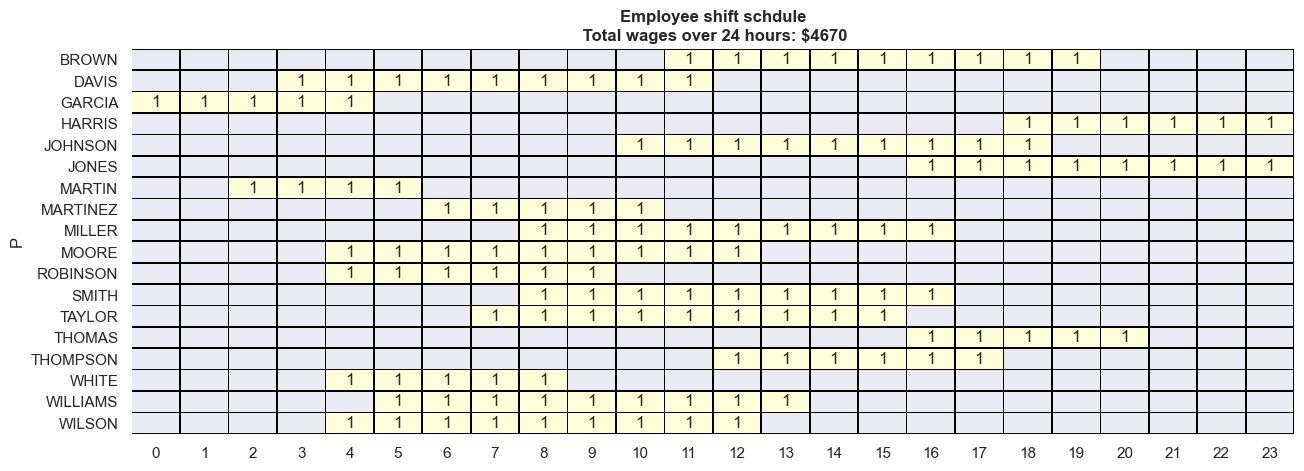

In [17]:
sns.set(rc={'figure.figsize':(15, 5)})
sns.heatmap(data2, mask=(data2==0), linewidths=.5, linecolor='black', annot=True, square=False, cbar=False, cmap="YlGnBu",)\
    .set_title('Employee shift schdule\n Total wages over 24 hours: ${}'.format(int(pulp.value(model.objective))), weight='bold')

In [18]:
data['MIN'] = data['P'].map(md).apply(lambda x:x[0])
data['MAX'] = data['P'].map(md).apply(lambda x:x[1])
data['cost'] = data['P'].map(md).apply(lambda x:x[2])
data['START'] = data['P'].map(md).apply(lambda x:x[3])
data['END'] = data['P'].map(md).apply(lambda x:x[4])
data['D'] = data['E'] - data['S']

In [19]:
# Check Money
print('Total Cost:{}'.format(sum(data['D']*data['cost'])))

Total Cost:4670


In [20]:
#需滿足每小時所需人數的最低需求
list(np.sum(data2,axis=0))>=REQUIRED

True

In [21]:
#每位員工每天只能工作一個班次
len(set(data['P']))==data.shape[0]

True

In [22]:
#員工只能在他們可得的時間上班
data[(data['S']>=data['START'])&(data['E']<=data['END'])].shape[0]==data.shape[0]

True

In [23]:
#如果該員工需上班，則他必須滿足他最少所需上班的時數且不得大於他最多能上班時數
data[(data['D']>=data['MIN'])&(data['D']<=data['MAX'])].shape[0]==data.shape[0]

True

In [24]:
output_required = list(np.sum(data2,axis=0))

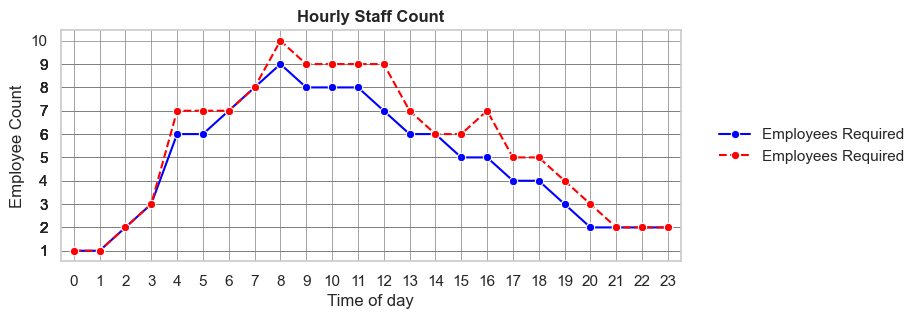

In [25]:
# 假設有兩條折線的數據
x_values = [str(r) for r in range(len(output_required))]
y1_values = REQUIRED  # 藍線
y2_values = output_required   # 紅線

# 將數據轉換成 DataFrame 格式
data3 = pd.DataFrame({'X': x_values, 'Blue Line': y1_values, 'Red Line': y2_values})

# 調整整個圖的比例
plt.figure(figsize=(8, 3))  # 設置圖的大小，可以根據需要調整寬和高

# 使用 Seaborn 畫折線圖，並添加方形點樣式的網格
sns.set(style="whitegrid")  # 設置風格，可以根據需要更改
sns.lineplot(x='X', y='Blue Line', data=data3, color='blue', label='Employees Required', marker='o')  # 加上'o'表示圓圈標記
sns.lineplot(x='X', y='Red Line', data=data3, color='red', label='Employees Required', marker='o', linestyle='--')    # 加上'o'表示圓圈標記

# 添加標題和軸標籤
plt.title('Hourly Staff Count', fontweight='bold')  # 標題
plt.xlabel('Time of day')  # x軸標籤
plt.ylabel('Employee Count')  # y軸標籤

plt.xticks(data3['X']) 
plt.yticks(data3['Blue Line'].tolist() + data3['Red Line'].tolist())  # 將所有 y 值加入刻度值
plt.xlim(-0.5, 23.5)

# 顯示方形點樣式的網格
plt.grid(color='gray', linestyle='-', linewidth=0.5, markersize=8)  # 添加方形點樣式的網格

# 顯示圖例
plt.legend(bbox_to_anchor=(1.04, 0.5), loc='center left', frameon=False)

# 顯示圖形
plt.show()
